# Lesson 05 
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Step 0: Read & Explore the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as ss

plt.rc('font', size=14) 

#### Load & Prepare Data

In [2]:
def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/WI_Breast_Cancer.csv"):
    data = pd.read_csv(fileName, comment='#', header=None)
    data.columns = ['id', 'class','thickness','uniformity of cell size','uniformity of cell shape',
        'adhesion','single epithelial cell size','bare nuclei','bland chromatin', 
        'normal nucleoli', 'mitosis']
        

    data = data.drop(columns=['id'], axis=1)
    
    return data

diagnoses = prepare()
print('Prepared...')

Prepared...


In [3]:
diagnoses.head()

,class,thickness,uniformity of cell size,uniformity of cell shape,adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


In [4]:
diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   class                        699 non-null    int64
 1   thickness                    699 non-null    int64
 2   uniformity of cell size      699 non-null    int64
 3   uniformity of cell shape     699 non-null    int64
 4   adhesion                     699 non-null    int64
 5   single epithelial cell size  699 non-null    int64
 6   bare nuclei                  699 non-null    int64
 7   bland chromatin              699 non-null    int64
 8   normal nucleoli              699 non-null    int64
 9   mitosis                      699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


## Step 1: Test both entropy and the gini coefficient. Which performs better and why?

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

labels=['Benign','Malignant']

In [6]:
X = diagnoses.drop(columns = "class")
Y = diagnoses["class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

#### Using Entropy

In [7]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_ent_pred = entropy_tree.predict(X_test)
print("Predicted: ")
print(y_ent_pred)
print("Actual: ")
print(y_test.tolist())

Predicted: 
[4 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4
 4 2 2 2 2 2 4 2 2 2 2 4 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2
 4 4 4 2 4 4 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2
 2 4 2 2 2 2 4 2 4 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 4 4 2]
Actual: 
[4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2]


#### Using Gini

In [8]:
# Gini/Information gain is the default criterion
gini_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_gini_pred = gini_tree.predict(X_test)
print("Predicted: ")
print(y_gini_pred)
print("Actual: ")
print(y_test.tolist())

Predicted: 
[4 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4
 4 2 2 2 2 2 4 2 2 2 2 4 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2
 2 4 4 2 4 4 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 4 4 2 2
 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2]
Actual: 
[4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2]


#### Comparing Confusion Matrices

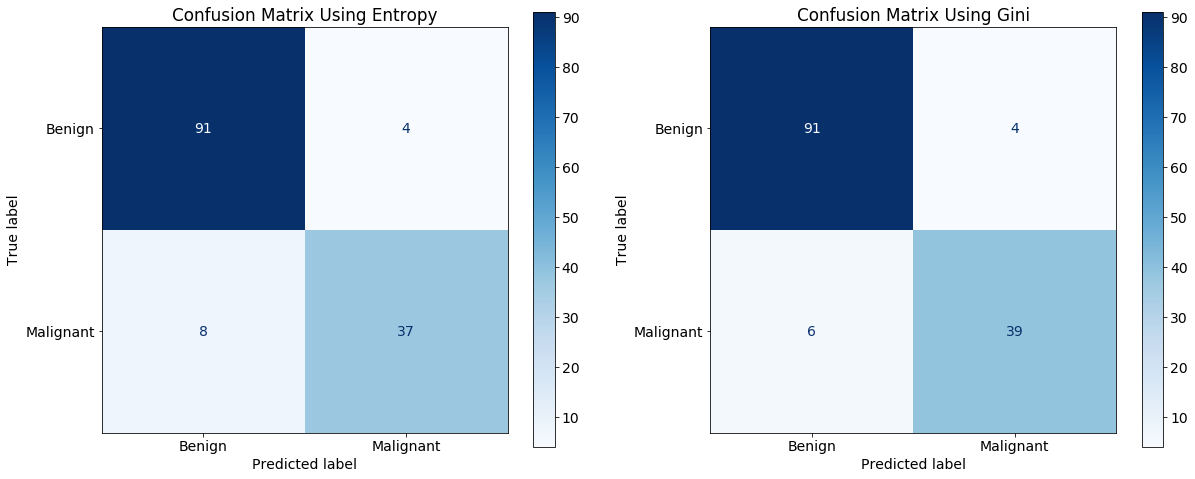

In [9]:
fig, axs = plt.subplots(1, 2, squeeze=True, figsize=(20, 8))
ent_confusion = plot_confusion_matrix(entropy_tree, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs[0]);
ent_confusion.ax_.set_title("Confusion Matrix Using Entropy");
gini_confusion = plot_confusion_matrix(gini_tree, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs[1]);
gini_confusion.ax_.set_title("Confusion Matrix Using Gini");

#### Comparing Accuracy

In [10]:
print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 91.42857142857143%
Gini accuracy is : 92.85714285714286%


#### Comparing Precision, Recall, F1 & Friends

Report for the decision tree using the entropy criterion,

In [11]:
print(classification_report(y_test, y_ent_pred, target_names=labels))

              precision    recall  f1-score   support

      Benign       0.92      0.96      0.94        95
   Malignant       0.90      0.82      0.86        45

    accuracy                           0.91       140
   macro avg       0.91      0.89      0.90       140
weighted avg       0.91      0.91      0.91       140



Report for the decision tree using the gini criterion

In [12]:
print(classification_report(y_test, y_gini_pred, target_names=labels))

              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95        95
   Malignant       0.91      0.87      0.89        45

    accuracy                           0.93       140
   macro avg       0.92      0.91      0.92       140
weighted avg       0.93      0.93      0.93       140



#### Conclusion

Both the Gini and Entropy criterion with the default hyper-parameters provided for the DecisionTreeClassifier perform almost identically. Given the seriousness of what we would like to predict overall would like to do better if we can. We will see if that's possible through tuning the hyper-parameters.

## Step 2: What are the best hyperparameter settings for both?

In [13]:
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds, criteria):
    param_grid = { 'max_depth': np.arange(3, 15), 'min_samples_leaf':np.arange(2, 6)}
    # decision tree model
    dtree_model=DecisionTreeClassifier(criterion=criteria)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

def report_best(X, y, X_tst, y_tst, nfolds, criteria, lbls):    
    best_params = dtree_grid_search(X, y, nfolds, criteria)
    print(f'Best Params: {best_params}')
    classifier = DecisionTreeClassifier(criterion=criteria, 
                                               max_depth=best_params['max_depth'], 
                                               min_samples_leaf=best_params['min_samples_leaf'])
    classifier.fit(X_train, y_train)
    y_ent_pred = classifier.predict(X_tst)
    print("Entropy accuracy is : {}%".format(accuracy_score(y_tst, y_ent_pred)*100))
    print(classification_report(y_tst, y_ent_pred, target_names=lbls))

#### Tuning the Decision Tree Under Entropy

In [14]:
for x in range (1, 10):
    print(f'Trial {x}')
    report_best(X_train, y_train, X_test, y_test, 5, 'entropy', labels)

Trial 1
Best Params: {'max_depth': 3, 'min_samples_leaf': 2}
Entropy accuracy is : 91.42857142857143%
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94        95
   Malignant       0.88      0.84      0.86        45

    accuracy                           0.91       140
   macro avg       0.91      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140

Trial 2
Best Params: {'max_depth': 3, 'min_samples_leaf': 2}
Entropy accuracy is : 91.42857142857143%
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94        95
   Malignant       0.88      0.84      0.86        45

    accuracy                           0.91       140
   macro avg       0.91      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140

Trial 3
Best Params: {'max_depth': 3, 'min_samples_leaf': 2}
Entropy accuracy is : 91.42857142857143%
              precision    recall  f1-sc

#### Tuning the Decision Tree Under Gini

In [15]:
for x in range (1, 30):
    print(f'Trial {x}')
    report_best(X_train, y_train, X_test, y_test, 5, 'gini', labels)

Trial 1
Best Params: {'max_depth': 7, 'min_samples_leaf': 4}
Entropy accuracy is : 94.28571428571428%
              precision    recall  f1-score   support

      Benign       0.97      0.95      0.96        95
   Malignant       0.89      0.93      0.91        45

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

Trial 2
Best Params: {'max_depth': 6, 'min_samples_leaf': 4}
Entropy accuracy is : 92.85714285714286%
              precision    recall  f1-score   support

      Benign       0.96      0.94      0.95        95
   Malignant       0.87      0.91      0.89        45

    accuracy                           0.93       140
   macro avg       0.91      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140

Trial 3
Best Params: {'max_depth': 6, 'min_samples_leaf': 4}
Entropy accuracy is : 94.28571428571428%
              precision    recall  f1-sc

#### Conclusion

After running GridSearchCV multiple times I consistently get a recommendation of `{'max_depth': 3, 'min_samples_leaf': 2}` for the decision tree under entropy. However, I appear to get different results everytime I run GridSearchCV for a decision tree under Gini. After running 30 iterations the trial with the best balance of accurancy, precision and recall would be a tree with the following hyperparameters `{'max_depth': 6, 'min_samples_leaf': 4}`. While there were other trials with greater depth and the same metrics I choose the depth of `6` to reduce the complexity of the tree.

## Step3: Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?

**WARNING**: You probably don't need to run the next box, but I did probably because of how I'm running things. My environment is probably very different from most, I'm running Jupyter under a Docker container on a Linux box. 

In [198]:
!sudo apt-get update;
!sudo apt-get -y install graphviz;
print('Done installing... ')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 1s (196 kB/s)    
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
Done installing... 


In [16]:
import os
from sklearn import tree
from IPython.display import Image

def show_tree(out_name, model, feature_names, w, h):
    dotfile = open(out_name + ".dot", 'w')
    tree.export_graphviz(model, out_file = dotfile, filled = True, rounded = True, feature_names = feature_names)
    dotfile.close()

    #os.environ["PATH"] += os.pathsep + graphviz_path
    os.system('dot -Tpng {}.dot -o {}.png'.format(out_name, out_name))

    return(Image(filename = out_name + '.png', width = w, height = h))

#### Visualizing the Decision Tree Under Entropy

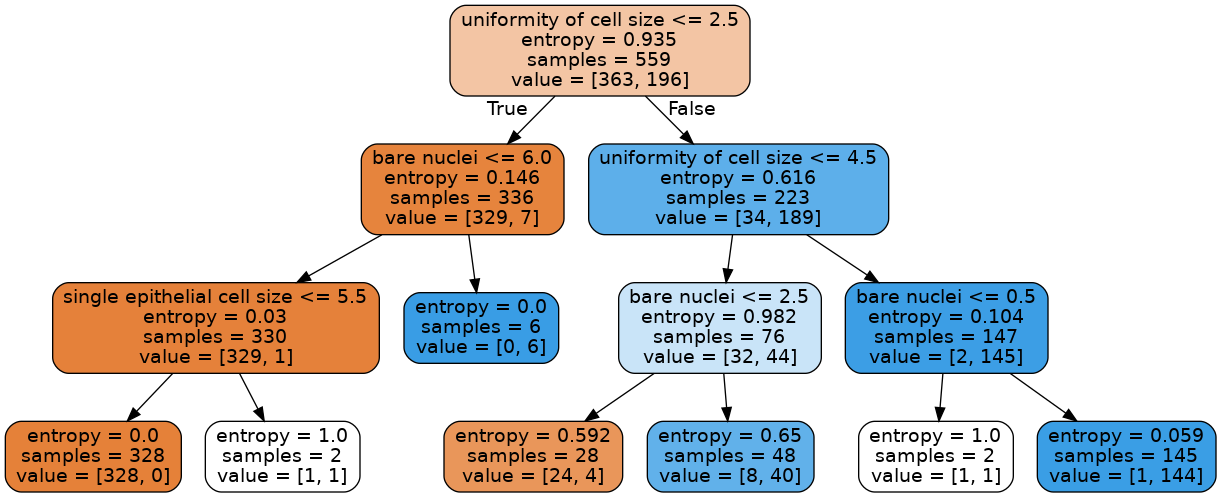

In [17]:
opt_entropy_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf=2).fit(X_train, y_train)
show_tree('dtree_under_entropy', opt_entropy_tree, X_train.columns, 750, 750)

#### Visualizing the Decision Tree Under Gini

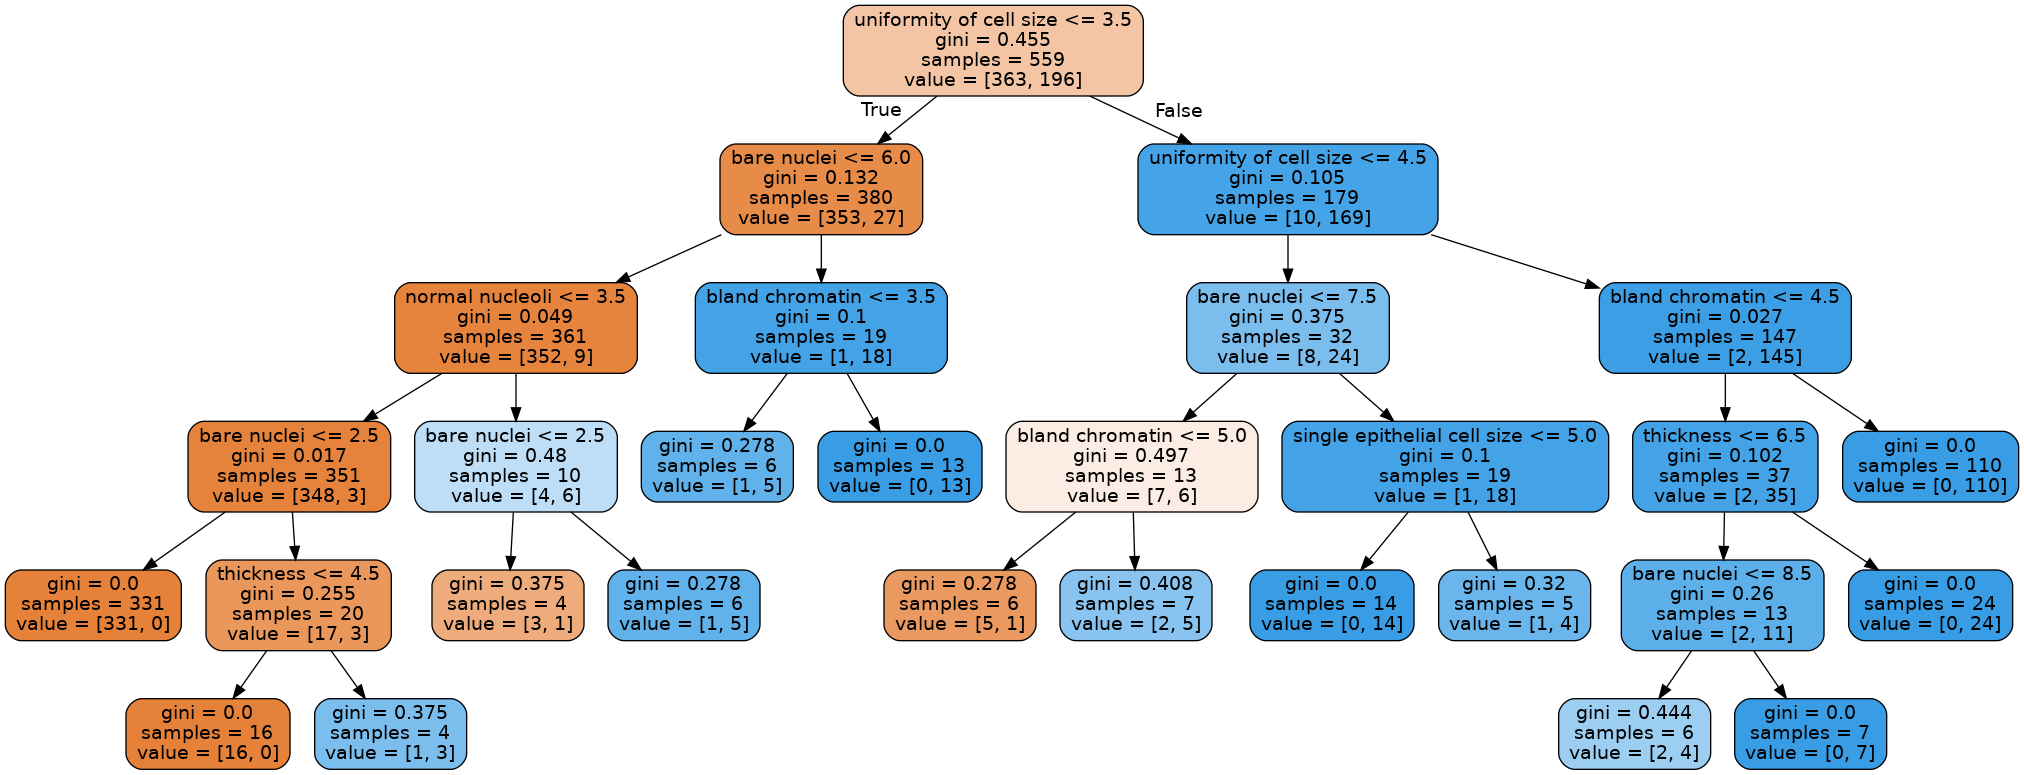

In [18]:
opt_gini_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=6, min_samples_leaf=4).fit(X_train, y_train)
show_tree('dtree_under_gini', opt_gini_tree, X_train.columns, 850, 850)

#### Conclusion

As can be seen from the visualizations the root of both trees starts with the feature `Uniformity of Cell Size`.

## Step 4: Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?

#### AUC

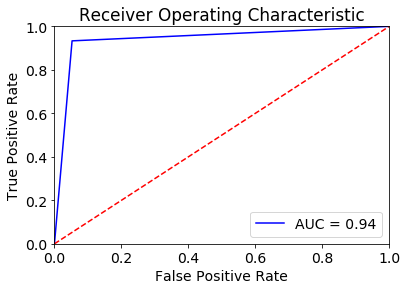

In [21]:
from sklearn import metrics

best_model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=4)
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_best_pred, pos_label=4)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Precision and Recall 

In [22]:
print(classification_report(y_test, y_best_pred, target_names=labels))

              precision    recall  f1-score   support

      Benign       0.97      0.95      0.96        95
   Malignant       0.89      0.93      0.91        45

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



#### What to Optimize For.

Perhaps what is optimized for could differ depending on age group. Generally, I could see **recall** as what one would optimize for if the demographic of women still have a lot of their life ahead of them. That demographic could perhaps better endure treatment and there are synthetic options that are more accepted then they once were. Perhaps for some older demographic of woman one leans towards **precision** because going through the treatment would be worse than just living out the rest of their life. At this point it becomes a very personal decision.

## Step 5: What are the implications of using this type of machine learning algorithm for breast cancer analysis?

Given that decision trees are transparent about what lead to the classification we can more easily understand what factors most stongly suggest a give classification of cancer.